In [1]:
# Model Training and Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

In [15]:
df = pd.read_csv('data/stud.csv')

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# Preparing X and y variables

X = df.drop(columns=['math score'], axis=1)

In [18]:
X.shape

(1000, 7)

In [19]:
print("Categorical in 'gender' variable:       ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:          ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categorical in 'gender' variable:        ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:           ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [20]:
# we want to predict the math score
y = df['math score']

In [21]:
# Create column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Performing Onehot encoding on categorical features
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [22]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [23]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape:  ", X_test.shape)

X_train shape:  (800, 19)
X_test shape:   (200, 19)


In [25]:
# Create an Evaluation Function to give all metrics after model training
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoostRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    
   
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Training the model
  
    y_train_pred = model.predict(X_train)  # Predicting on training data
    y_test_pred = model.predict(X_test)    # Predicting on testing data

    # Evaluate train and test data
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print("Model performance on Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------------')

    print("Model performance on Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance on Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
---------------------------------------------
Model performance on Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge
Model performance on Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
---------------------------------------------
Model performance on Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso
Model performance on Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
---------------------------------------------
Model performance on Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Model performance on Training set
- Root Mean Squared Error: 5.7084
- Mean Absolute Error: 4.5160
- R2 Score: 0.85

In [28]:
import pandas as pd
# Results dataframe
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852599
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.850126
6,XGBoostRegressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.747779


In [29]:
# Linear Regression 

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
score = r2_score(y_test, y_pred) *100
print(" Accuracy of the model is %.2f" % score)

 Accuracy of the model is 88.04


Text(0.5, 1.0, 'Actual vs Predicted')

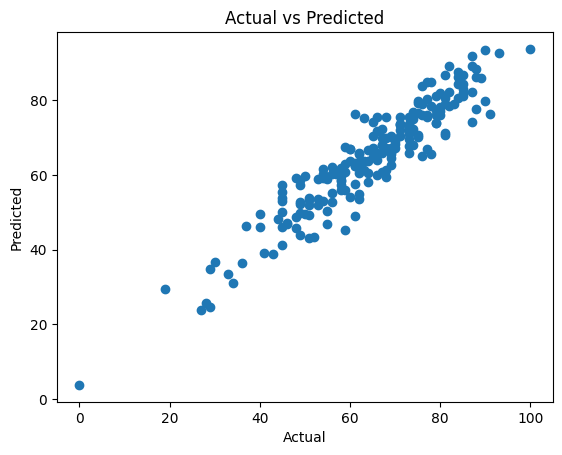

In [30]:
# Plot y_pred and y_test
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

<Axes: xlabel='math score'>

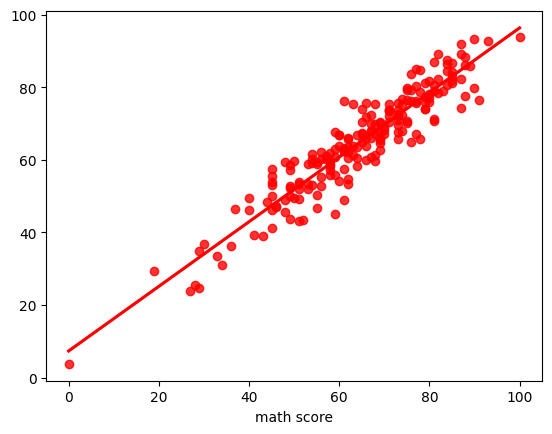

In [32]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red')

In [33]:
# Difference between actual and predicted values

pred_df = pd.DataFrame({"Actual Values": y_test, "Predicted Values": y_pred, "Difference": y_test - y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
